In [13]:
import matplotlib.pyplot as plt
from helpers.cm26 import DatasetCM26
from helpers.computational_tools import select_NA, Experiment
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
ds = DatasetCM26()

In [44]:
exp = Experiment(ds.data, ds.param)

In [45]:
zb = exp.ZB20()

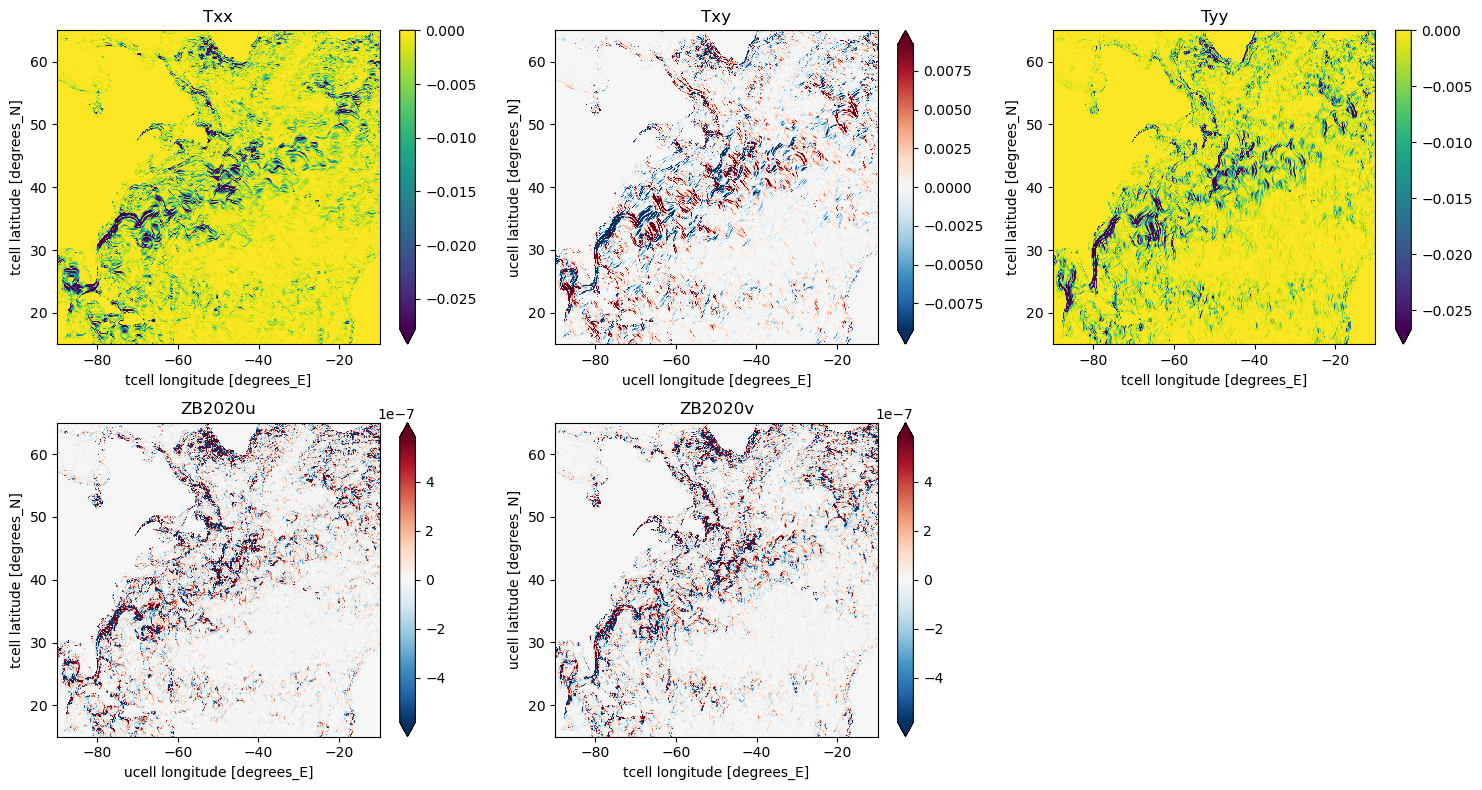

In [46]:
plt.figure(figsize=(15,8))
for j,key in enumerate(['Txx', 'Txy', 'Tyy', 'ZB2020u', 'ZB2020v']):
    plt.subplot(2,3,j+1)
    select_NA(zb[key]).plot(robust=True)
    plt.title(key)
plt.tight_layout()

In [47]:
sh_xy, sh_xx, vort_xy = exp.velocity_gradients()

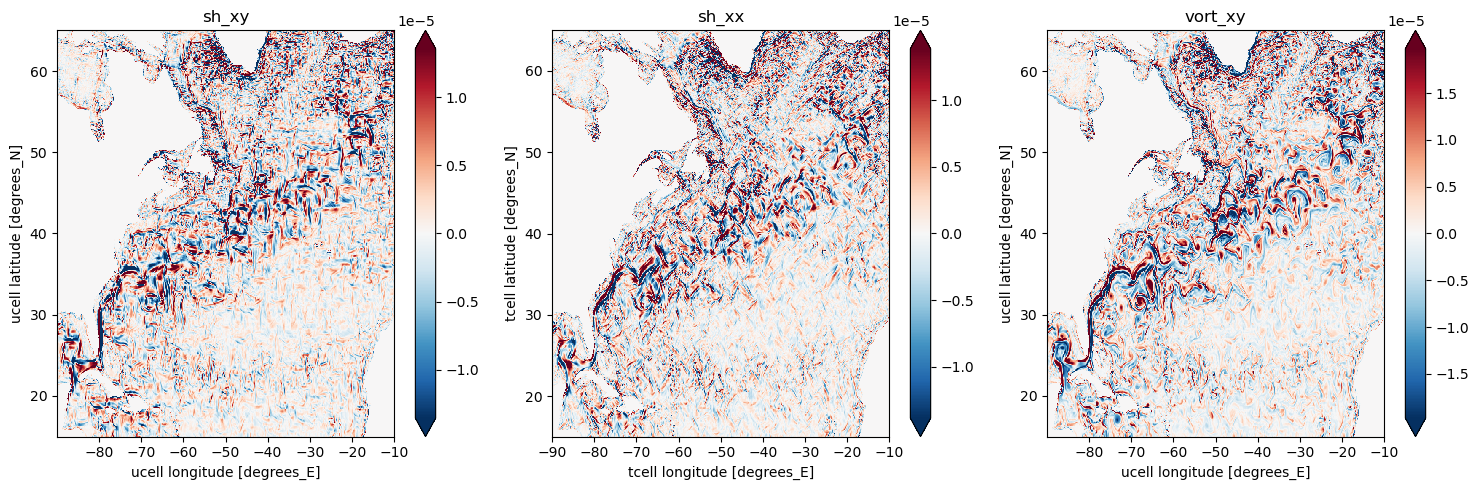

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
select_NA(sh_xy).plot(robust=True); plt.title('sh_xy')
plt.subplot(1,3,2)
select_NA(sh_xx).plot(robust=True); plt.title('sh_xx')
plt.subplot(1,3,3)
select_NA(vort_xy).plot(robust=True); plt.title('vort_xy')
plt.tight_layout()

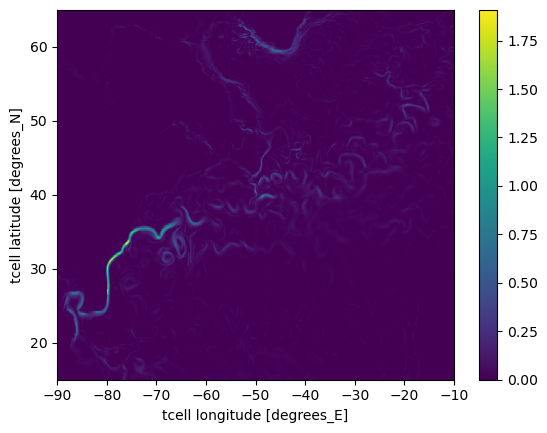

In [49]:
select_NA(exp.KE_Arakawa()).plot()

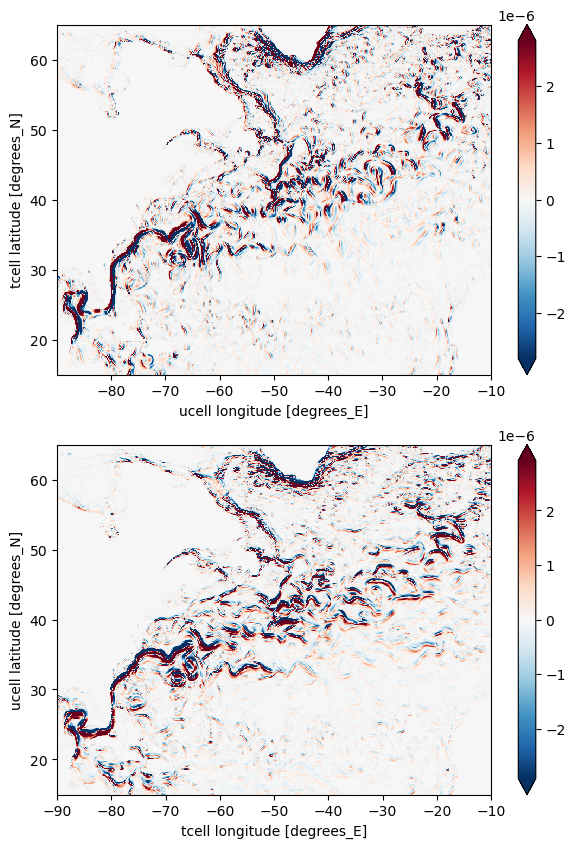

In [52]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1); select_NA(exp.gradKE()[0]).plot(robust=True)
plt.subplot(2,1,2); select_NA(exp.gradKE()[1]).plot(robust=True)

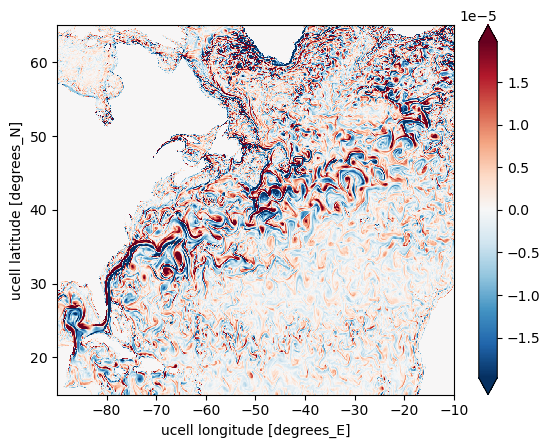

In [53]:
select_NA(exp.relative_vorticity()).plot(robust=True)

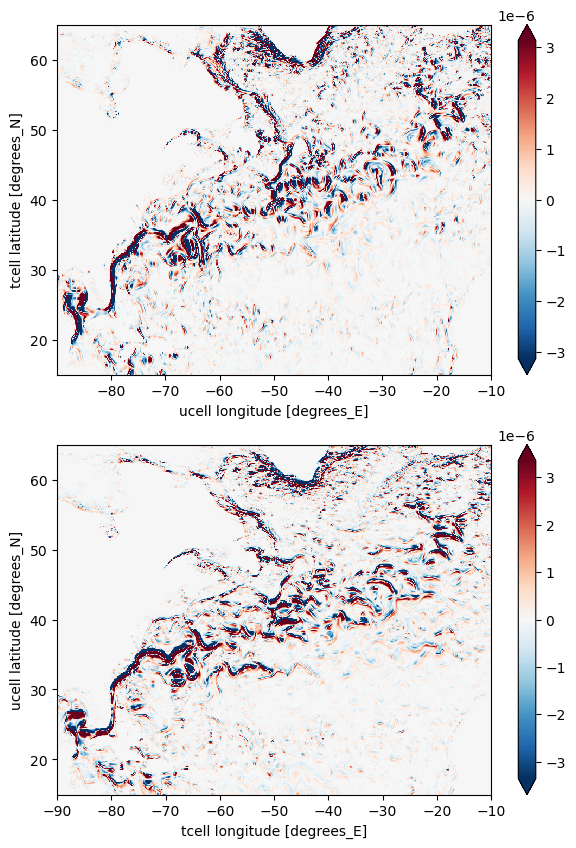

In [54]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1); select_NA(exp.PV_cross_uv()[0]).plot(robust=True)
plt.subplot(2,1,2); select_NA(exp.PV_cross_uv()[1]).plot(robust=True)

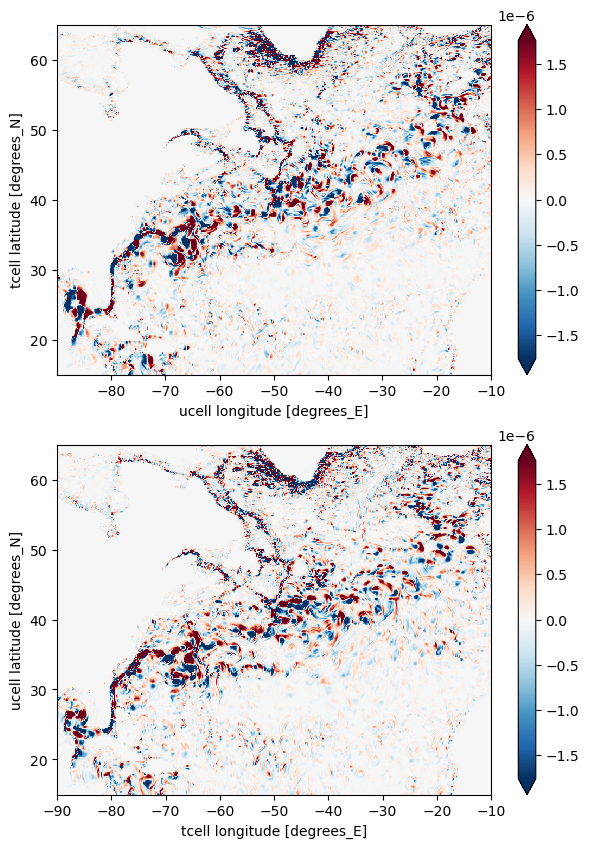

In [55]:
plt.figure(figsize=(7,10))
plt.subplot(2,1,1); select_NA(exp.advection()[0]).plot(robust=True)
plt.subplot(2,1,2); select_NA(exp.advection()[1]).plot(robust=True)

# Comparison of two forms of vorticity

In [75]:
# We compare masked fields because outside there may be 1e+20 values
def compare(tested, control, mask, vmax=None):
    tested = select_NA(tested * mask)
    control = select_NA(control * mask)
    
    plt.figure(figsize=(12,20))
    plt.subplot(3,1,1)
    tested.plot(vmax=vmax, robust=True)
    plt.xlabel(''); plt.ylabel('')
    plt.title('Tested field')
    plt.subplot(3,1,2)
    control.plot(vmax=vmax, robust=True)
    plt.title('Control field')
    plt.xlabel(''); plt.ylabel('')
    plt.subplot(3,1,3)
    np.abs((tested-control)).plot(vmax=vmax, robust=True)
    plt.title('Difference')
    plt.xlabel(''); plt.ylabel('')
    plt.tight_layout()
    error = np.abs(((tested-control))).mean() / np.abs(control).mean()
    print('Relative Error:', float((error**2).sum()))
    print('Nans:', int(np.sum(np.isnan(error))))

Relative Error: 3.995716349043335e-05
Nans: 0


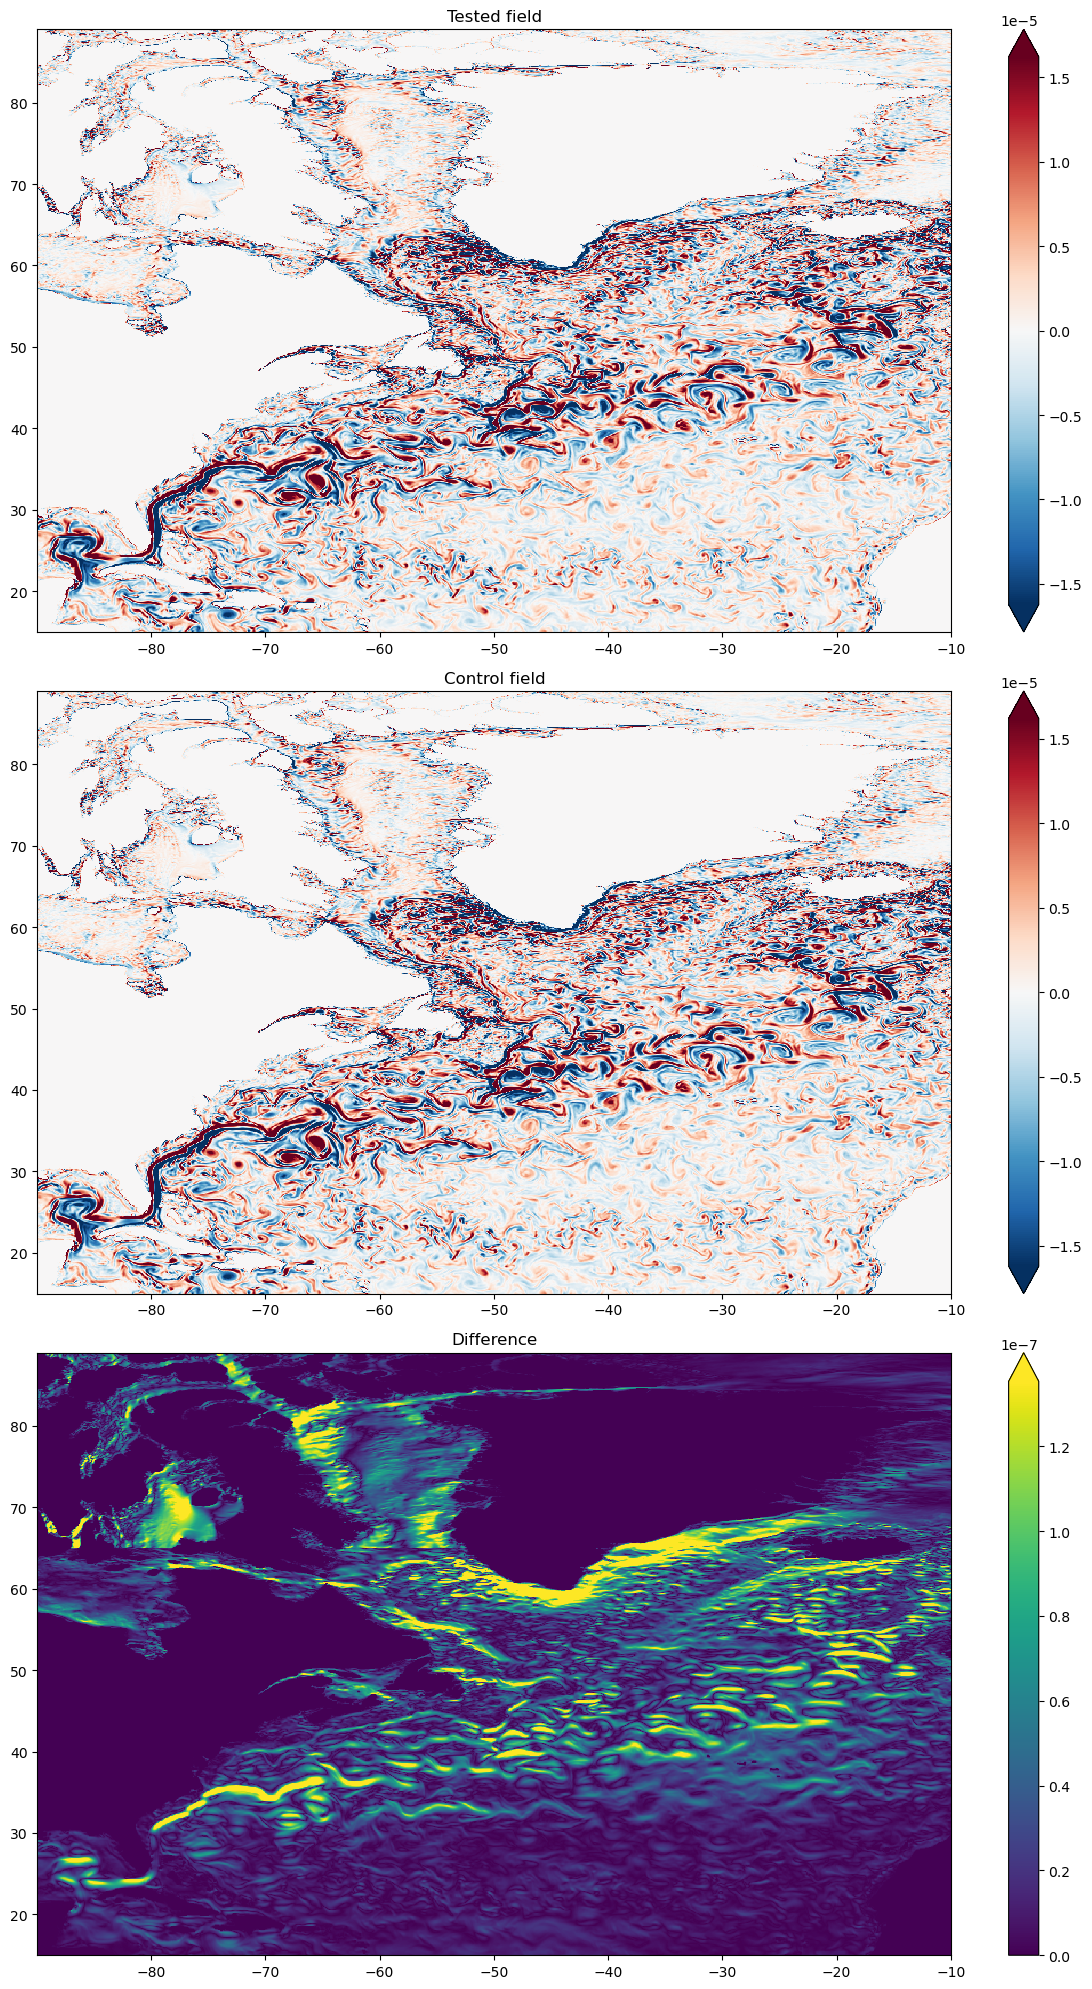

In [76]:
compare(exp.velocity_gradients()[2], exp.relative_vorticity(), exp.param.wet_c)